In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

In [8]:
#df = pd.read_csv('/gdrive/My Drive/InsighTD-AnalisisColombia/EASE_Data4RQ3_4Jupyter.csv', sep="|", index_col=False)
df = pd.read_csv('Data_RQ3_Heatmap.csv', sep=";", index_col=False)
df.columns.tolist()

['CAUSES', 'REPAYMENTS', 'FREQ']

In [9]:
df.head(20)

,CAUSES,REPAYMENTS,FREQ
0,1. DEADLINE,REFACTORING,3
1,1. DEADLINE,CODE REVIEWING,2
2,1. DEADLINE,IMPROVE DESIGN,2
3,1. DEADLINE,ARCHITECTURAL CHANGES,1
4,2. INAPPROPRIATE PLANNING,REFACTORING,4
5,2. INAPPROPRIATE PLANNING,IMPROVE DESIGN,2
6,2. INAPPROPRIATE PLANNING,ADOPTION OF GOOD PRACTICES,1
7,2. INAPPROPRIATE PLANNING,CODE REVIEWING,1
8,2. INAPPROPRIATE PLANNING,SYSTEM RETIREMENT,1
9,2. INAPPROPRIATE PLANNING,TECHNOLOGY/TOOL/PLATFORM CHANGE,1


In [10]:
#dfA = df[df['ROLE']=='ARCHITECT']
dfA = df

In [11]:
dfA.replace(to_replace ="IMPROVEMENT IN REQUIREMENT ELICITATION", value ="IMPROV. REQUIREM. ELICIT.", inplace=True) 
dfA.replace(to_replace ="TECHNOLOGY INDEPENDENT IMPLEMENTATION", value ="TECH. INDEPEND. IMPL.", inplace=True) 
dfA.replace(to_replace ="TECHNOLOGY/TOOL/PLATFORM CHANGE", value ="TECH/TOOL/PLATF. CHANGE", inplace=True) 
dfA.replace(to_replace ="HIRING QUALIFIED PROFESSIONALS", value ="HIRING QUAL. PROs.", inplace=True) 

(11.0, 0.0)

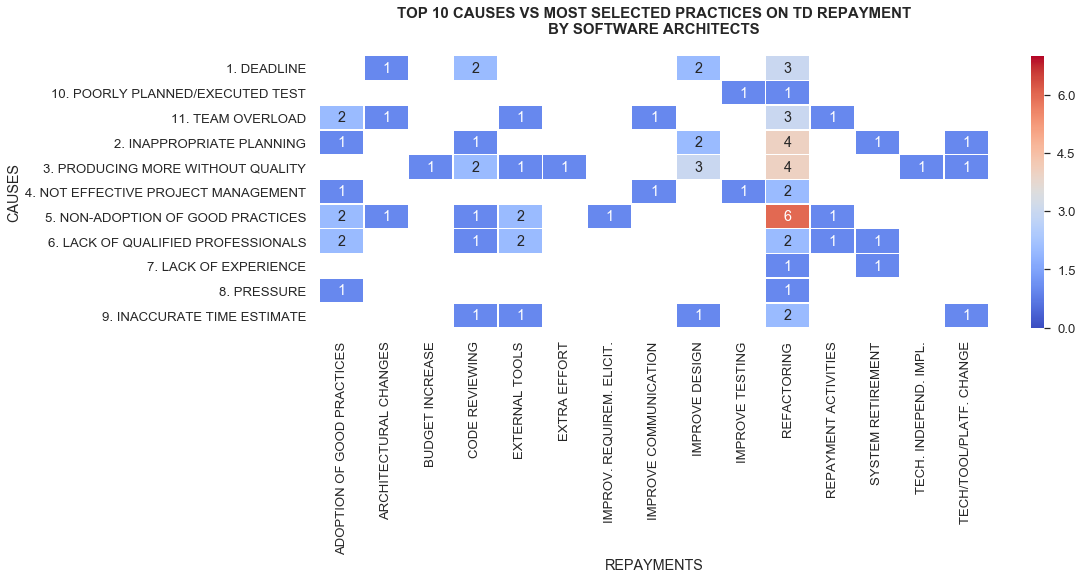

In [12]:
df1 = dfA.pivot("CAUSES", "REPAYMENTS", "FREQ")

plt.figure(figsize = (15,5))

sns.set(font_scale=1.2)
ax = sns.heatmap(df1, vmin=0, vmax=7, cmap="coolwarm", linewidths=.5, annot=True, fmt=".0f", robust=True)
ax.set_facecolor('xkcd:white')
ax.set_title("TOP 10 CAUSES VS MOST SELECTED PRACTICES ON TD REPAYMENT\nBY SOFTWARE ARCHITECTS\n", fontsize=15, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)